<a href="https://colab.research.google.com/github/Athotakb88/CodSoft-DataScience-Internship/blob/main/Task_5_Creditcard_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Credit Card Fraud Detection using ML Models
Internship Project – CodSoft Data Science

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/
!ls

/content/drive/MyDrive/Colab Notebooks
 creditcard.csv
 movies.csv
 sales.csv
 Task1.Titanic_Survival_Prediction.ipynb
 Task2_Movie_Rating_Prediction.ipynb
'Task 4_Sales_Prediction.ipynb'
'Task 5_Creditcard_fraud_detection.ipynb'
 train.csv


In [5]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score
)


In [7]:
#Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
#Dataset Information
print("Dataset Shape:", df.shape)
print("\nClass Distribution:")
print(df['Class'].value_counts())


Dataset Shape: (284807, 31)

Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


In [9]:
#Feature & Target Split
X = df.drop('Class', axis=1)
y = df['Class']

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (284807, 30)
y shape: (284807,)


In [10]:
#Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


X_test: (56962, 30)
y_test: (56962,)


In [11]:
#Train Random Forest Model
rf = RandomForestClassifier(
    n_estimators=30,
    max_depth=8,
    min_samples_split=10,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
print("Model training completed")


Model training completed


In [12]:
#Prediction
y_pred = rf.predict(X_test)

print("y_test length:", len(y_test))
print("y_pred length:", len(y_pred))


y_test length: 56962
y_pred length: 56962


In [13]:
#Model Evaluation
#✅ Accuracy & Classification Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.9995259997893332

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.78      0.85        98

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [14]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[56859     5]
 [   22    76]]


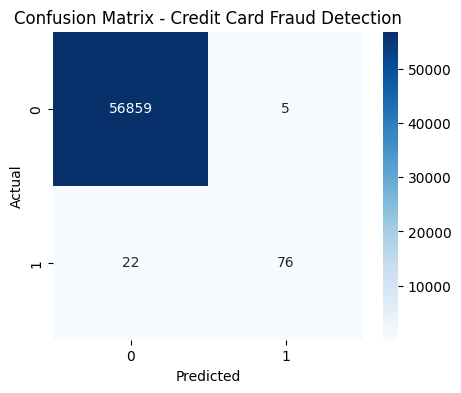

In [15]:
#Confusion Matrix Visualization
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Credit Card Fraud Detection")
plt.show()


In [16]:
#ROC–AUC Score
y_prob = rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)



ROC-AUC Score: 0.9600393671115043


Methodology

The dataset was split into training and testing sets using an 80:20 ratio. A Random Forest classifier was trained on the training data.

Evaluation

Model performance was evaluated using Accuracy, Precision, Recall, F1-score, Confusion Matrix, and ROC-AUC score.